<a href="https://colab.research.google.com/github/sabrybenamor/Machine-Learning-with-Python/blob/master/Predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling




  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-06-10 12:24:18--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.9’

insurance.csv.9     100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2025-06-10 12:24:18 (6.45 MB/s) - ‘insurance.csv.9’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df=pd.get_dummies(dataset,drop_first=True)
from sklearn.model_selection import train_test_split
train_dataset,test_dataset=train_test_split(df,test_size=0.2,random_state=0)
train_labels=train_dataset.pop('expenses')
test_labels=test_dataset.pop('expenses')

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),  # First hidden layer
    layers.Dense(32, activation='relu'),                                         # Second hidden layer
    layers.Dense(16, activation='relu'),                                         # Third hidden layer
    layers.Dense(1)  # Output layer for regression (no activation)
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae','mse']
)

# Train the model
model.fit(train_dataset, train_labels, epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 9721.3135 - mae: 9721.3135 - mse: 211614576.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7002.3823 - mae: 7002.3823 - mse: 156578464.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6153.3677 - mae: 6153.3677 - mse: 130924896.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4685.5073 - mae: 4685.5073 - mse: 72520944.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4401.8457 - mae: 4401.8457 - mse: 55458344.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3457.1733 - mae: 3457.1733 - mse: 43878404.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3673.0776 - mae: 3673.0776 - mse: 45593080.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4209.7397 - mae: 4209.7397 - mse: 49395580.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3474.6028 - mae: 3474.6028 - mse: 39840652.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

In [ ]:
print([train_dataset.shape[1]])

[8]


9/9 - 0s - 36ms/step - loss: 2291.5220 - mae: 2291.5220 - mse: 20438082.0000
Testing set Mean Abs Error: 2291.52 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


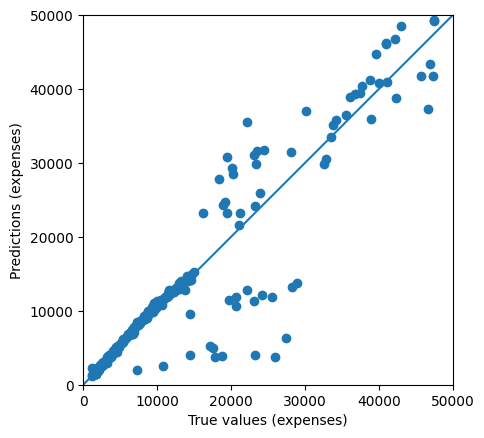

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
